<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/notebooks/Object_tracking_class_with_optical_flow_rectification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/trained_models/400_700_v2_68.h5

--2023-07-15 12:59:21--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/trained_models/400_700_v2_68.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/trained_models/400_700_v2_68.h5 [following]
--2023-07-15 12:59:21--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/trained_models/400_700_v2_68.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626104 (611K) [application/octet-stream]
Saving to: ‘400_700_v2_68.h5’

400_700_v2_68.h5    100%[===================>] 611.43K  --.-KB/s    in 0.04s   

2023-07-15 12:59:22 (

In [2]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/optical%20flow/480_60.mov

--2023-07-15 12:59:25--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/optical%20flow/480_60.mov
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/optical%20flow/480_60.mov [following]
--2023-07-15 12:59:25--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/optical%20flow/480_60.mov
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30461035 (29M) [application/octet-stream]
Saving to: ‘480_60.mov’

480_60.mov          100%[===================>]  29.05M  68.3MB/s    in 0.4s    

2023-07-15 12:59:26 (68.3 MB/s) - ‘480_60.mo

In [3]:
!wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/utils/utils.py

--2023-07-15 13:00:39--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/utils/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3137 (3.1K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   3.06K  --.-KB/s    in 0s      

2023-07-15 13:00:40 (31.9 MB/s) - ‘utils.py’ saved [3137/3137]



In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/400_700_v2_68.h5')

In [5]:
from IPython.display import HTML

# Provide the path to the video file
video_path = 'https://github.com/ZackAkil/stateful-object-tracking/raw/main/optical%20flow/480_60.mov'

# Generate the HTML code to embed the video
video_html = f"""
<video controls autoplay>
    <source src="{video_path}" type="video/mp4">
</video>
"""

# Display the video in Colab
HTML(video_html)

In [6]:
import cv2

# Open the video file
video_path = '/content/480_60.mov'
video = cv2.VideoCapture(video_path)

In [7]:
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
total_frames

3799

In [8]:
import numpy as np

In [9]:
WIDTH = 700
HEIGHT = 400
n = 500

X = np.zeros((n, HEIGHT, WIDTH, 3))

In [10]:
for i in range(n):
  ret, frame = video.read()
  frame = cv2.resize(frame, (700, 400))
  frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
  X[i,:,:,:] = frame/255.

In [11]:
import matplotlib.pyplot as plt

In [12]:
X.shape

(500, 400, 700, 3)

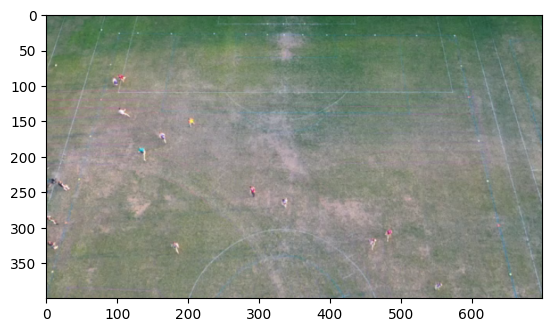

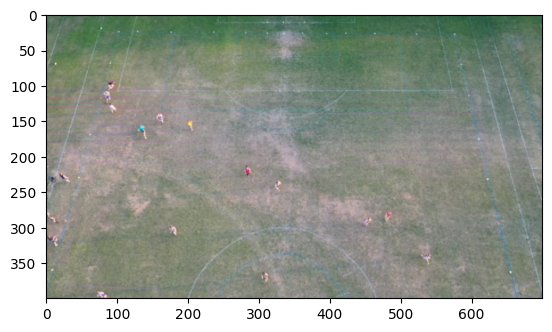

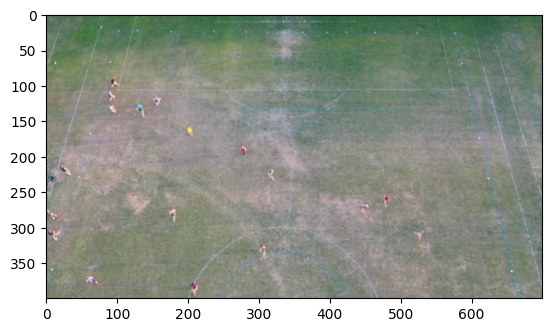

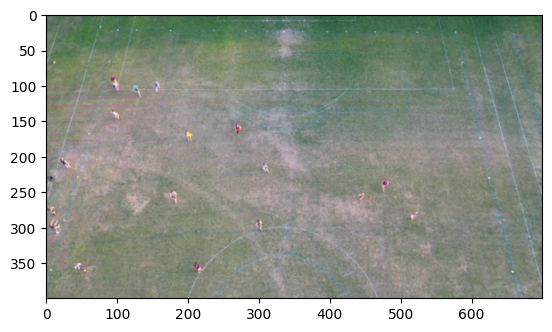

In [14]:
for i in range(0,120,30):
  plt.imshow(X[i])
  plt.show()

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 400, 700, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_16 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_18 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 400, 700, 1)      

In [16]:
len(X)

500

In [17]:
prediction = model.predict(X)

16/16 [==============================] - 17s 396ms/step


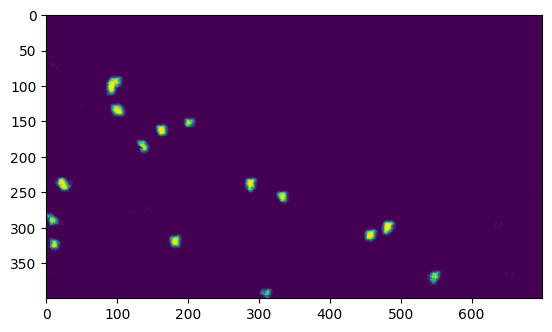

In [18]:
plt.imshow(prediction[10])

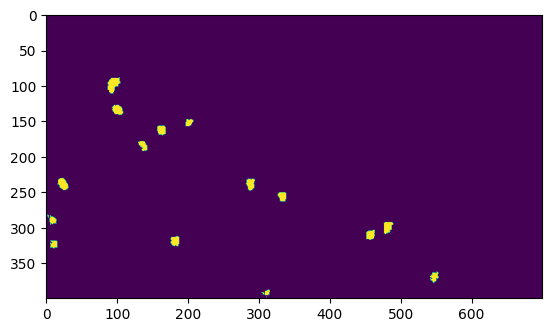

In [19]:
plt.imshow(prediction[10]>0.5)

In [20]:
import importlib

In [21]:
import utils

In [22]:
importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

In [23]:
raw_boxes = []

for pred in prediction:
  boxes = utils.run_box_huristic(pred, 0.5)
  raw_boxes.append(boxes)

In [24]:
len(raw_boxes)

500

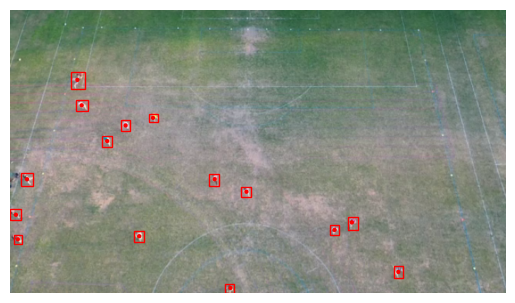

In [25]:
utils.plot_boxes(X[10], raw_boxes[10])

# Create path based on boxes

In [26]:
# given a collection of bboxes using the mid-points

In [27]:
xs = []
ys = []
frame_counts = []

for frame in raw_boxes:
  frame_counts.append(len(frame))
  for box in frame:
    x = box['pos']['x']
    y = box['pos']['y']
    xs.append(x)
    ys.append(y)

In [28]:
# make pretty colours
numbers = frame_counts
indexed_list = [idx for idx, num in enumerate(numbers) for _ in range(num)]

# Plot all mid points over the course of all frames

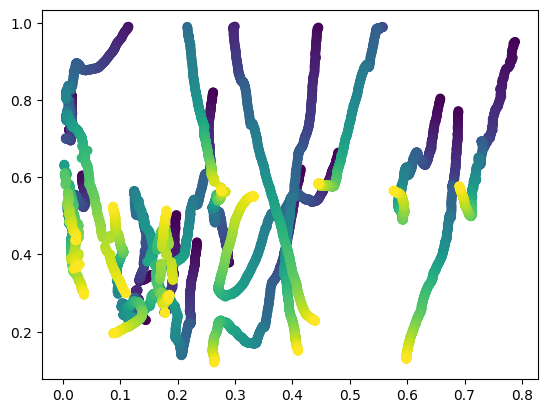

In [30]:
plt.scatter(xs, ys, c=indexed_list)

In [34]:
import math

class Stateful_Object:

  def __init__(self):
    self.name = ""
    self.frames = []
    self.active = True
    self.grace_periode = 30
    self.closeness_threshold = .030

  def __str__(self):
    return f"Stateful Object with {len(self.frames)} frames."

  def __dict__(self):
        return {'frames':self.frames}

  def previous_position(self):
    return self.frames[-1]

  def closeness(self, bbox):
    x1 = bbox['pos']['x']
    y1 = bbox['pos']['y']

    prev_bbox  = self.previous_position()
    x2 = prev_bbox['pos']['x']
    y2 = prev_bbox['pos']['y']

    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance

  def is_same_object(self, bbox):
    return self.closeness(bbox) < self.closeness_threshold

  def add_bbox(self, bbox, time_stamp):
    return self.frames.append({**bbox, "time_stamp": time_stamp})


class Stateful_Object_Tracker:

  def __init__(self):
    self.stateful_objects = []

  def __dict__(self):
    return {'object_tracks': [s_o.__dict__() for s_o in self.stateful_objects]}
        # return self.stateful_objects

  def __json__(self):
    return {'object_tracks': [s_o.__dict__() for s_o in self.stateful_objects]}

  def analyse_frames(self, frames):
    for i, frame in enumerate(frames):
      self.analyse_frame(frame, i)


  def analyse_frame(self, frame, time_stamp):

    for bbox in frame:

      closest_object = self.find_closest_object(bbox)

      if closest_object:
        closest_object.add_bbox(bbox, time_stamp)
      else:
        new_s_object = Stateful_Object()
        new_s_object.add_bbox(bbox, time_stamp)
        self.stateful_objects.append(new_s_object)


  def find_closest_object(self, bbox):
    # return the closest valid match
    if self.stateful_objects == []:
      return None

    ranked_objects = sorted(self.stateful_objects,
                            key=lambda obj: obj.closeness(bbox))

    if ranked_objects[0].is_same_object(bbox):
      return ranked_objects[0]

    return None

  def plot_tracks(self):

    for s_o in self.stateful_objects:
      frames = s_o.frames
      x = [p['pos']['x'] for p in frames]
      y = [p['pos']['y'] for p in frames]
      plt.plot(x, y)
    plt.show()

In [35]:

tracker = Stateful_Object_Tracker()
tracker.analyse_frames(raw_boxes)


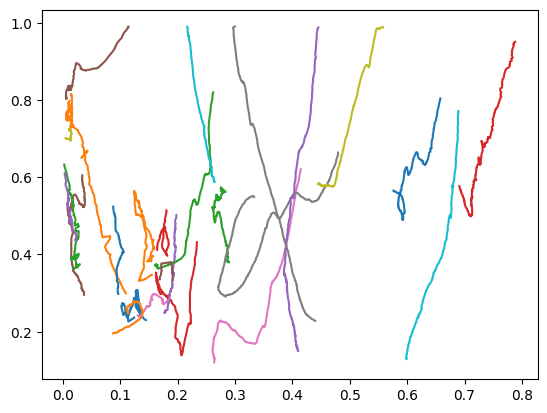

In [36]:
tracker.plot_tracks()

In [37]:
print(tracker.stateful_objects[0])

Stateful Object with 266 frames.


In [38]:
import json

In [ ]:
json_data = json.dumps(tracker.__json__(), indent=4)
with open("tracking_500.json", "w") as file:
    file.write(json_data)

# Rectify using optical flow data

In [39]:
! wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/optical%20flow/flow_data.json

--2023-07-15 13:06:12--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/optical%20flow/flow_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175868 (172K) [text/plain]
Saving to: ‘flow_data.json’

flow_data.json      100%[===================>] 171.75K  --.-KB/s    in 0.03s   

2023-07-15 13:06:13 (6.03 MB/s) - ‘flow_data.json’ saved [175868/175868]



In [40]:
# Specify the path to your JSON file
file_path = "/content/flow_data.json"

# Open the JSON file and load its contents
with open(file_path, "r") as file:
    optical_flow_data = json.load(file)

In [80]:
OFM_data = optical_flow_data['flow']
len(OFM_data)

3798

In [103]:
start_pos_x = 0
start_pos_y = 0

flow_xs = []
flow_ys = []

pitch_poses = []

for flow in OFM_data:

  flow_xs.append(start_pos_x)
  flow_ys.append(start_pos_y)

  pitch_poses.append((start_pos_x, start_pos_y))

  start_pos_x += flow[0]
  start_pos_y += flow[1]

colours = list(range(len(OFM_data)))

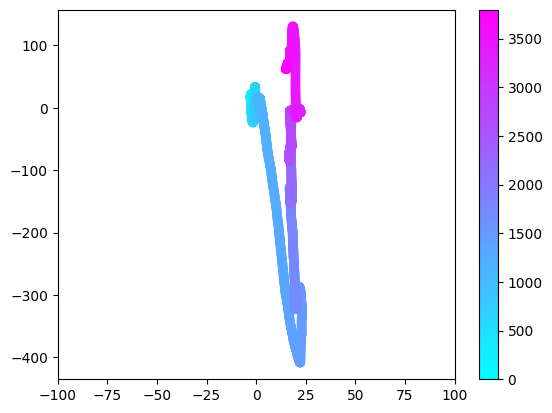

In [85]:
plt.scatter(flow_xs, flow_ys, c=colours, cmap='cool')
plt.xlim(-100,100)
plt.colorbar()

In [73]:
# check it matches
HTML(video_html)

In [104]:
# zip boxes and OFM togetehr

len(raw_boxes), len(pitch_poses[:500])

(500, 500)

In [93]:
import copy

def rectify_box(box, pitch_pos):

  new_box = copy.deepcopy(box)
  x, y = pitch_pos

  new_box['pos']['x'] += x
  new_box['pos']['y'] += y

  new_box['bbox']['min_x'] += x
  new_box['bbox']['min_y'] += y
  new_box['bbox']['max_x'] += x
  new_box['bbox']['max_y'] += y

  return new_box

In [105]:
rectified_boxes = []

for boxes_in_frame, pitch_pos in zip(raw_boxes, pitch_poses[:500]):
  rectified_frame = []

  for box in boxes_in_frame:
    new_box = rectify_box(box, pitch_pos)
    rectified_frame.append(new_box)

  rectified_boxes.append(rectified_frame)

In [106]:
len(rectified_boxes)

500

In [109]:
rectified_tracker = Stateful_Object_Tracker()
rectified_tracker.analyse_frames(rectified_boxes)

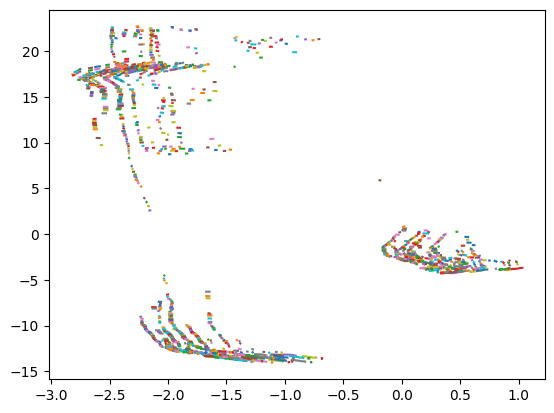

In [110]:
rectified_tracker.plot_tracks()